In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("spotify_dataset.csv")
print("Dataset shape:", df.shape)

Dataset shape: (41099, 20)


In [5]:
#removing unnecessary columns
drop_cols = ['track', 'artist', 'uri', 'decade']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

df.dropna(subset=['popularity'], inplace=True)

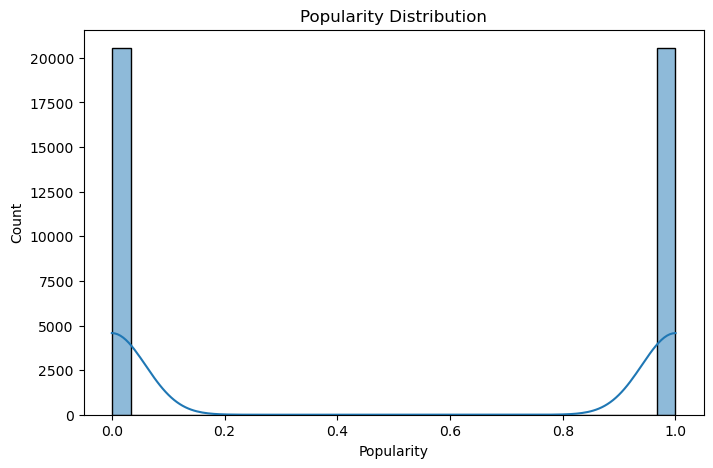

In [7]:
# popularity distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [9]:
# binary target: is_hit
threshold = np.percentile(df['popularity'], 75)  # top 25% as "hit"
df['is_hit'] = (df['popularity'] >= threshold).astype(int)

print("Class distribution:\n", df['is_hit'].value_counts())

Class distribution:
 is_hit
0    20551
1    20548
Name: count, dtype: int64


In [11]:
X = df.drop(columns=['popularity', 'is_hit'])
y = df['is_hit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Preprocessing pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])

X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
for name, model in models.items():
    model.fit(X_train_prepared, y_train)
    predictions = model.predict(X_test_prepared)
    
    print(f"\n==== {name} ====")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))


==== Logistic Regression ====
Accuracy: 0.733941605839416
Confusion Matrix:
 [[2708 1402]
 [ 785 3325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.71      4110
           1       0.70      0.81      0.75      4110

    accuracy                           0.73      8220
   macro avg       0.74      0.73      0.73      8220
weighted avg       0.74      0.73      0.73      8220


==== Random Forest ====
Accuracy: 0.7952554744525547
Confusion Matrix:
 [[3083 1027]
 [ 656 3454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79      4110
           1       0.77      0.84      0.80      4110

    accuracy                           0.80      8220
   macro avg       0.80      0.80      0.79      8220
weighted avg       0.80      0.80      0.79      8220


==== SVM ====
Accuracy: 0.7805352798053528
Confusion Matrix:
 [[2828 1282]
 [ 522 3588]]
Cla